<a href="https://colab.research.google.com/github/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/blob/main/IME625A_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##**DATA EXTRACTION**

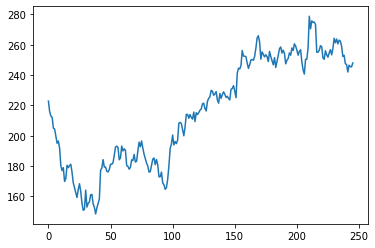

In [10]:
url1 = (r'https://raw.githubusercontent.com/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/main/SBIN.NS%20(3).csv')
url2 = (r'https://raw.githubusercontent.com/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/main/SBIN.NS(12).csv')
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

data = data1['Adj Close']
data = data.to_numpy()

actual_prices = data2['Adj Close']
actual_prices = actual_prices.to_numpy()

plt.plot(data)

##**PARAMETER ESTIMATION**

In [11]:
prices = np.array(data)
U_list = np.log(prices[1:]/prices[:-1])
n = len(prices) - 1
Eu = sum(U_list) / float(n)
sigma2 = np.sum((U_list - Eu)**2) / (n-1)
mu = Eu + sigma2 / 2.0

##**SIMULATION**##

In [15]:
num_samples = 100
def stock_price(data, days, num_samples):
	samples = []
	for num in range(num_samples):
		S_prev = prices[-1]
		for i in range(days):
			S = S_prev * np.exp((mu - sigma2/2) + np.sqrt(sigma2)*np.cumsum(np.random.normal()))
			S_prev = S
		samples.append(S)
	samples = np.array(samples)
	expected_price = np.mean(samples)
	return expected_price
expected_prices = []
l = len(actual_prices)
for i in range(l):
	expected_prices.append(stock_price(data, i+1, num_samples))
expected_prices = np.array(expected_prices)

##**DATA COMPARISON**##

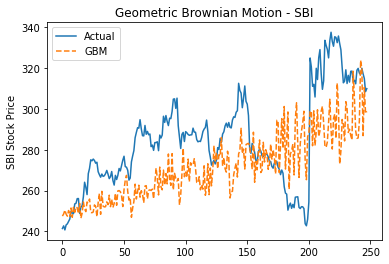

In [13]:
plt.plot(actual_prices, label = 'Actual')
plt.plot(expected_prices, label = 'GBM', ls='--')

plt.ylabel('SBI Stock Price')
plt.title('Geometric Brownian Motion - SBI')

plt.legend(loc = 'upper left')